In [7]:
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

datetime64[ns]


In [9]:
month_avgs = df.groupby(['Location', 'Month']).mean(numeric_only=True)
month_cols = ['Monthly' + c for c in month_avgs.columns]
month_avgs.columns = month_cols
month_avgs.head()


MonthlyMinTemp  MonthlyMaxTemp  MonthlyRainfall  \
Location Month                                                    
Adelaide 1           18.062007       30.954122         0.769118   
         2           17.835841       30.053540         1.005357   
         3           15.954480       27.105735         1.187407   
         4           12.934167       23.317083         1.416102   
         5           10.739427       19.183513         2.216988   

                MonthlyEvaporation  MonthlySunshine  MonthlyWindGustSpeed  \
Location Month                                                              
Adelaide 1               11.885915        11.178488             38.931900   
         2                9.598374         9.651079             37.243243   
         3                6.986395         8.260109             35.176471   
         4                4.846957         7.357778             32.474790   
         5                2.396104         5.288525             31.545126   

                MonthlyWindSpeed9am  MonthlyWindSpeed3pm  MonthlyHumidity9am  \
Location Month                                                                 
Adelaide 1                 9.935484            16.379061           47.273381   
         2                 8.805310            15.765487           51.685841   
         3                 8.028674            15.050360           59.340502   
         4                 8.441667            14.016736           58.779167   
         5                 8.035842            12.597122           68.146953   

                MonthlyHumidity3pm  MonthlyPressure9am  MonthlyPressure3pm  \
Location Month                                                               
Adelaide 1               32.452899         1013.725448         1011.937906   
         2               35.411504         1015.583186         1013.938938   
         3               40.311828         1017.913043         1016.174275   
         4               43.853556         1021.398750         1018.993724   
         5               53.755396         1021.917921         1019.690288   

                MonthlyCloud9am  MonthlyCloud3pm  MonthlyTemp9am  \
Location Month                                                     
Adelaide 1                  NaN              NaN       23.029496   
         2                  NaN              NaN       22.136283   
         3                  NaN              NaN       19.443728   
         4                  NaN              NaN       17.795000   
         5                  NaN              NaN       14.591398   

                MonthlyTemp3pm  MonthlyDay  MonthlyDayOfWeek  
Location Month                                                
Adelaide 1           29.314440   16.000000          3.046595  
         2           28.417257   14.628319          2.982301  
         3           25.665591   16.000000          2.982079  
         4           22.114226   15.500000          2.995833  
         5           18.151439   16.000000          3.014337

In [10]:
print(df.shape)
df = df.merge(month_avgs, how='inner', left_on=['Location', 'Month'], right_index=True)
print(df.shape)
df.head()

(145460, 26)
(145460, 44)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,MonthlyHumidity9am,MonthlyHumidity3pm,MonthlyPressure9am,MonthlyPressure3pm,MonthlyCloud9am,MonthlyCloud3pm,MonthlyTemp9am,MonthlyTemp3pm,MonthlyDay,MonthlyDayOfWeek
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548


In [11]:
df['RainToday'] = df['RainToday'].replace(('Yes', 'No'), (1, 0))
df['RainTomorrow'] = df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))
df.head()

C:\Users\cappr\AppData\Local\Temp\ipykernel_14500\4238110154.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace(('Yes', 'No'), (1, 0))
C:\Users\cappr\AppData\Local\Temp\ipykernel_14500\4238110154.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,MonthlyHumidity9am,MonthlyHumidity3pm,MonthlyPressure9am,MonthlyPressure3pm,MonthlyCloud9am,MonthlyCloud3pm,MonthlyTemp9am,MonthlyTemp3pm,MonthlyDay,MonthlyDayOfWeek
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548


In [12]:
index = pd.MultiIndex.from_frame(df[['Location', 'Date']])
df.index = index
df = df.sort_index()
df['RainPast5Days'] = df['RainToday'].rolling(5).sum()
df['AvgMaxTemp5Days'] = df['MaxTemp'].rolling(5).mean()
df['AvgSunshine5Days'] = df['Sunshine'].rolling(5).mean()
df['AvgRainfall5Days'] = df['Rainfall'].rolling(5).mean()

In [13]:
train_cols = df.columns[~df.columns.isin(['Date', 'RainTomorrow'])]
train_cols                   

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Month', 'Day', 'DayOfWeek', 'MonthlyMinTemp',
       'MonthlyMaxTemp', 'MonthlyRainfall', 'MonthlyEvaporation',
       'MonthlySunshine', 'MonthlyWindGustSpeed', 'MonthlyWindSpeed9am',
       'MonthlyWindSpeed3pm', 'MonthlyHumidity9am', 'MonthlyHumidity3pm',
       'MonthlyPressure9am', 'MonthlyPressure3pm', 'MonthlyCloud9am',
       'MonthlyCloud3pm', 'MonthlyTemp9am', 'MonthlyTemp3pm', 'MonthlyDay',
       'MonthlyDayOfWeek', 'RainPast5Days', 'AvgMaxTemp5Days',
       'AvgSunshine5Days', 'AvgRainfall5Days'],
      dtype='object')

In [14]:
df[train_cols].dtypes

Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
Month                     int32
Day                       int32
DayOfWeek                 int32
MonthlyMinTemp          float64
MonthlyMaxTemp          float64
MonthlyRainfall         float64
MonthlyEvaporation      float64
MonthlySunshine         float64
MonthlyWindGustSpeed    float64
MonthlyWindSpeed9am     float64
MonthlyW

In [15]:
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [16]:
df =df[~df['RainTomorrow'].isnull()]

In [17]:
from sklearn.model_selection import train_test_split
df_X, df_test, y, y_test = train_test_split(df, df['RainTomorrow'].values, 
                        stratify=df['RainTomorrow'], test_size=0.15)
X = df_X[train_cols]
test = df_test[train_cols]

In [18]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 3.1/124.9 MB 18.4 MB/s eta 0:00:07
   -- ------------------------------------- 6.8/124.9 MB 17.5 MB/s eta 0:00:07
   --- ------------------------------------ 10.0/124.9 MB 16.8 MB/s eta 0:00:07
   ---- ----------------------------------- 14.2/124.9 MB 18.1 MB/s eta 0:00:07
   ------ --------------------------------- 20.2/124.9 MB 19.9 MB/s eta 0:00:06
   -------- ------------------------------- 26.2/124.9 MB 21.3 MB/s eta 0:00:05
   ---------- ----------------------------- 32.2/124.9 MB 22.5 MB/s eta 0:00:05
   ------------ --------------------------- 37.7/124.9 MB 23.1 MB/s eta 0:00:04
   -------------- ------------------------- 44.0/124.9 MB 23.9 MB/s eta 0:00:04
   --------------- ------------------------ 49.0/124.9 MB 24.2 MB/s eta 0:00:04
   ----------------- ---------------------- 54.3/124.9 MB 24.2 MB/s eta 0:00:03
   ------------------ --------------------- 59.0/12

In [19]:
!pip install catboost

   ---------------------------------------- 0.0/101.8 MB ? eta -:--:--
   - -------------------------------------- 4.2/101.8 MB 20.9 MB/s eta 0:00:05
   --- ------------------------------------ 9.2/101.8 MB 22.8 MB/s eta 0:00:05
   ----- ---------------------------------- 14.7/101.8 MB 24.3 MB/s eta 0:00:04
   ------- -------------------------------- 18.6/101.8 MB 23.0 MB/s eta 0:00:04
   --------- ------------------------------ 23.6/101.8 MB 23.0 MB/s eta 0:00:04
   ----------- ---------------------------- 28.3/101.8 MB 23.0 MB/s eta 0:00:04
   ------------ --------------------------- 31.7/101.8 MB 21.9 MB/s eta 0:00:04
   ------------- -------------------------- 34.1/101.8 MB 20.6 MB/s eta 0:00:04
   -------------- ------------------------- 37.7/101.8 MB 20.3 MB/s eta 0:00:04
   ---------------- ----------------------- 41.9/101.8 MB 20.2 MB/s eta 0:00:03
   ------------------ --------------------- 45.9/101.8 MB 20.1 MB/s eta 0:00:03
   ------------------- -------------------- 50.3/10

In [20]:
from sklearn.pipeline import make_pipeline
from feature_engine.encoding import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
model =  make_pipeline(OrdinalEncoder(encoding_method='arbitrary', missing_values='ignore', variables=categorical_cols),
                    CatBoostClassifier(iterations=500))
model.fit(X, y)

C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) WindGustDir, WindDir9am, WindDir3pm.
  warnings.warn(


Learning rate set to 0.150702
0:	learn: 0.5962292	total: 162ms	remaining: 1m 20s
1:	learn: 0.5273931	total: 187ms	remaining: 46.5s
2:	learn: 0.4819398	total: 214ms	remaining: 35.5s
3:	learn: 0.4532273	total: 240ms	remaining: 29.7s
4:	learn: 0.4324464	total: 261ms	remaining: 25.8s
5:	learn: 0.4175018	total: 284ms	remaining: 23.4s
6:	learn: 0.4048204	total: 310ms	remaining: 21.8s
7:	learn: 0.3951834	total: 334ms	remaining: 20.6s
8:	learn: 0.3888847	total: 358ms	remaining: 19.5s
9:	learn: 0.3828696	total: 385ms	remaining: 18.8s
10:	learn: 0.3778985	total: 414ms	remaining: 18.4s
11:	learn: 0.3733013	total: 442ms	remaining: 18s
12:	learn: 0.3702594	total: 465ms	remaining: 17.4s
13:	learn: 0.3668049	total: 490ms	remaining: 17s
14:	learn: 0.3644537	total: 514ms	remaining: 16.6s
15:	learn: 0.3621311	total: 540ms	remaining: 16.3s
16:	learn: 0.3604369	total: 564ms	remaining: 16s
17:	learn: 0.3584623	total: 590ms	remaining: 15.8s
18:	learn: 0.3565777	total: 618ms	remaining: 15.6s
19:	learn: 0.355

161:	learn: 0.3075267	total: 6.58s	remaining: 13.7s
162:	learn: 0.3073281	total: 6.61s	remaining: 13.7s
163:	learn: 0.3071517	total: 6.64s	remaining: 13.6s
164:	learn: 0.3069991	total: 6.67s	remaining: 13.5s
165:	learn: 0.3068310	total: 6.71s	remaining: 13.5s
166:	learn: 0.3066201	total: 6.75s	remaining: 13.5s
167:	learn: 0.3064719	total: 6.79s	remaining: 13.4s
168:	learn: 0.3062291	total: 6.84s	remaining: 13.4s
169:	learn: 0.3060450	total: 6.88s	remaining: 13.4s
170:	learn: 0.3058384	total: 6.92s	remaining: 13.3s
171:	learn: 0.3056618	total: 6.96s	remaining: 13.3s
172:	learn: 0.3054753	total: 7s	remaining: 13.2s
173:	learn: 0.3051934	total: 7.04s	remaining: 13.2s
174:	learn: 0.3050097	total: 7.08s	remaining: 13.2s
175:	learn: 0.3048672	total: 7.12s	remaining: 13.1s
176:	learn: 0.3047073	total: 7.15s	remaining: 13s
177:	learn: 0.3045879	total: 7.17s	remaining: 13s
178:	learn: 0.3044003	total: 7.2s	remaining: 12.9s
179:	learn: 0.3042796	total: 7.23s	remaining: 12.8s
180:	learn: 0.304100

328:	learn: 0.2829936	total: 12.3s	remaining: 6.38s
329:	learn: 0.2828891	total: 12.3s	remaining: 6.34s
330:	learn: 0.2827569	total: 12.3s	remaining: 6.29s
331:	learn: 0.2826769	total: 12.3s	remaining: 6.25s
332:	learn: 0.2825454	total: 12.4s	remaining: 6.2s
333:	learn: 0.2824463	total: 12.4s	remaining: 6.16s
334:	learn: 0.2823317	total: 12.4s	remaining: 6.11s
335:	learn: 0.2822192	total: 12.4s	remaining: 6.07s
336:	learn: 0.2820838	total: 12.5s	remaining: 6.02s
337:	learn: 0.2819602	total: 12.5s	remaining: 5.98s
338:	learn: 0.2818067	total: 12.5s	remaining: 5.94s
339:	learn: 0.2817146	total: 12.5s	remaining: 5.9s
340:	learn: 0.2815841	total: 12.6s	remaining: 5.85s
341:	learn: 0.2814966	total: 12.6s	remaining: 5.81s
342:	learn: 0.2813991	total: 12.6s	remaining: 5.76s
343:	learn: 0.2813244	total: 12.6s	remaining: 5.72s
344:	learn: 0.2812064	total: 12.6s	remaining: 5.68s
345:	learn: 0.2810970	total: 12.7s	remaining: 5.63s
346:	learn: 0.2809317	total: 12.7s	remaining: 5.59s
347:	learn: 0.

489:	learn: 0.2656939	total: 16.4s	remaining: 334ms
490:	learn: 0.2655892	total: 16.4s	remaining: 301ms
491:	learn: 0.2655132	total: 16.5s	remaining: 268ms
492:	learn: 0.2653987	total: 16.5s	remaining: 234ms
493:	learn: 0.2653050	total: 16.5s	remaining: 201ms
494:	learn: 0.2651998	total: 16.6s	remaining: 167ms
495:	learn: 0.2651367	total: 16.6s	remaining: 134ms
496:	learn: 0.2650554	total: 16.7s	remaining: 101ms
497:	learn: 0.2649553	total: 16.7s	remaining: 67ms
498:	learn: 0.2649025	total: 16.7s	remaining: 33.5ms
499:	learn: 0.2647887	total: 16.7s	remaining: 0us


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                missing_values='ignore',
                                variables=['Location', 'WindGustDir',
                                           'WindDir9am', 'WindDir3pm'])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x00000258E34253F0>)])

In [21]:
!pip install scikit-plot

In [22]:
!pip install sklearn-evaluation

C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) WindGustDir, WindDir9am, WindDir3pm.
  warnings.warn(


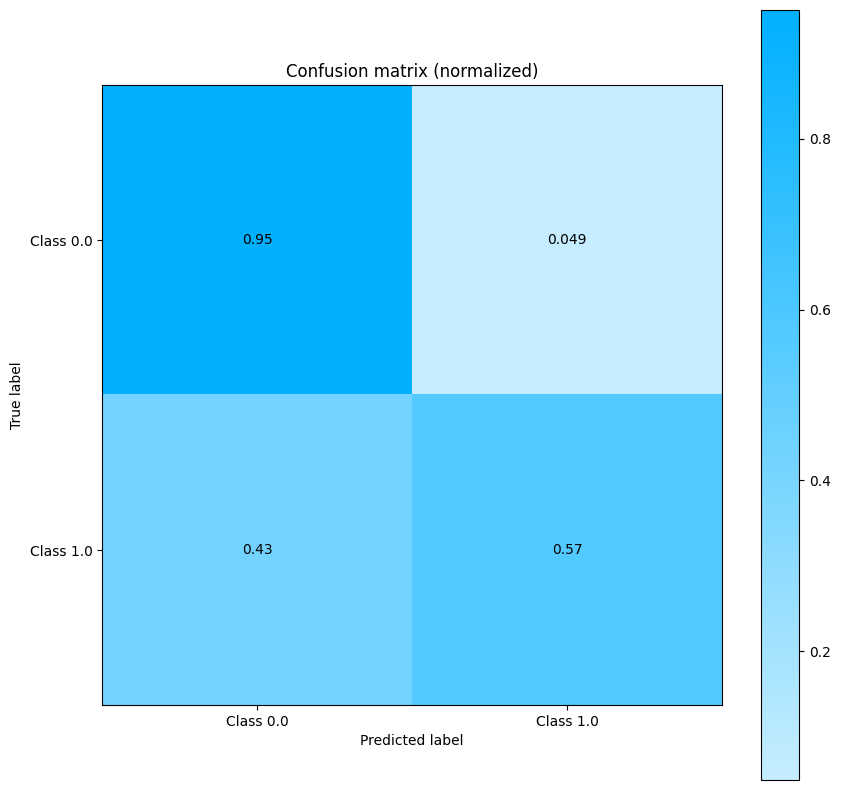

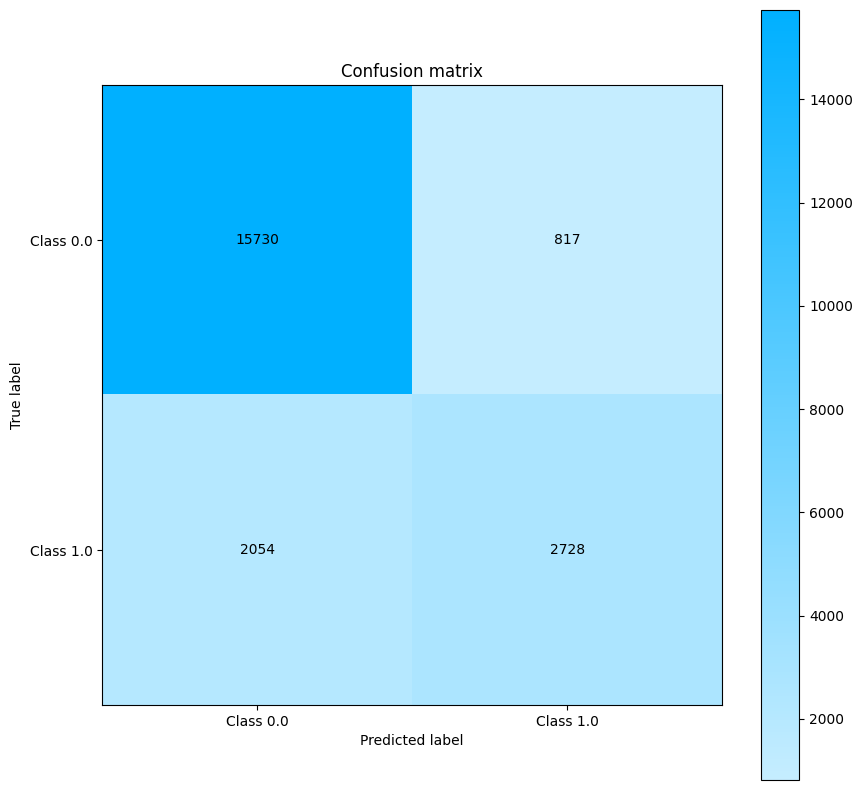

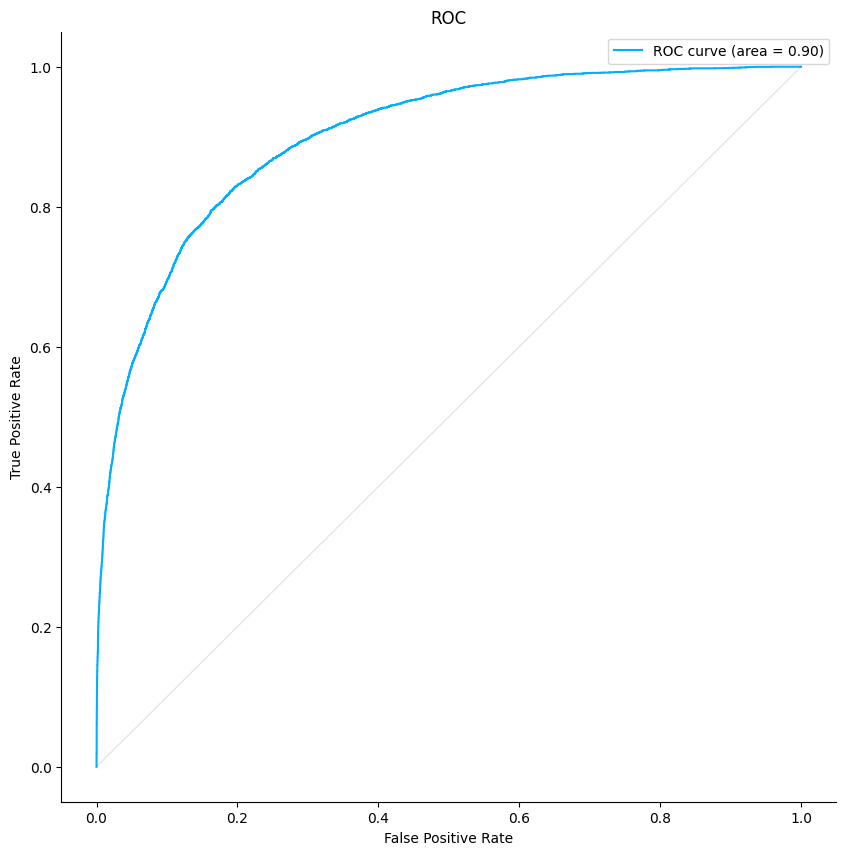

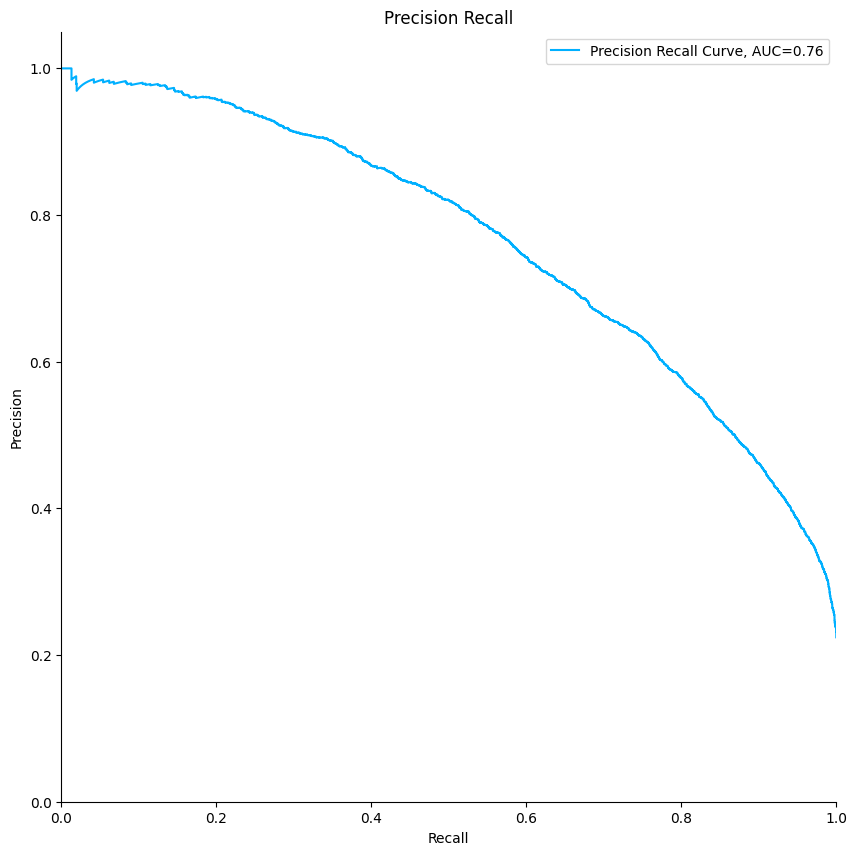

0.8653945332645694
0.7695345557122708
0.5704726056043496
0.655217965653897


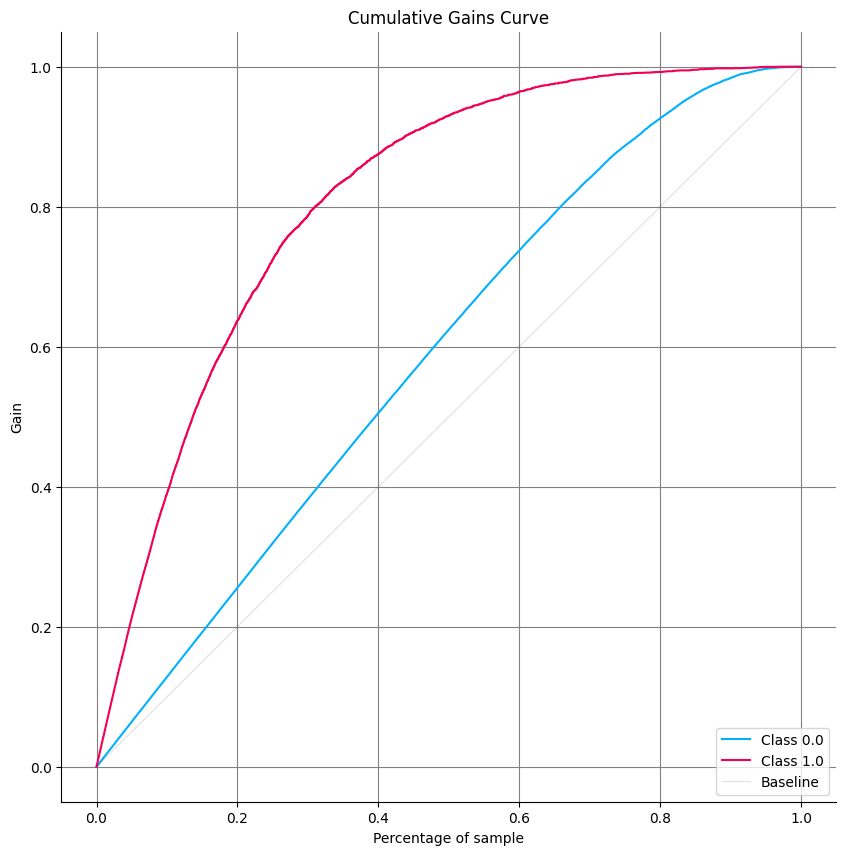

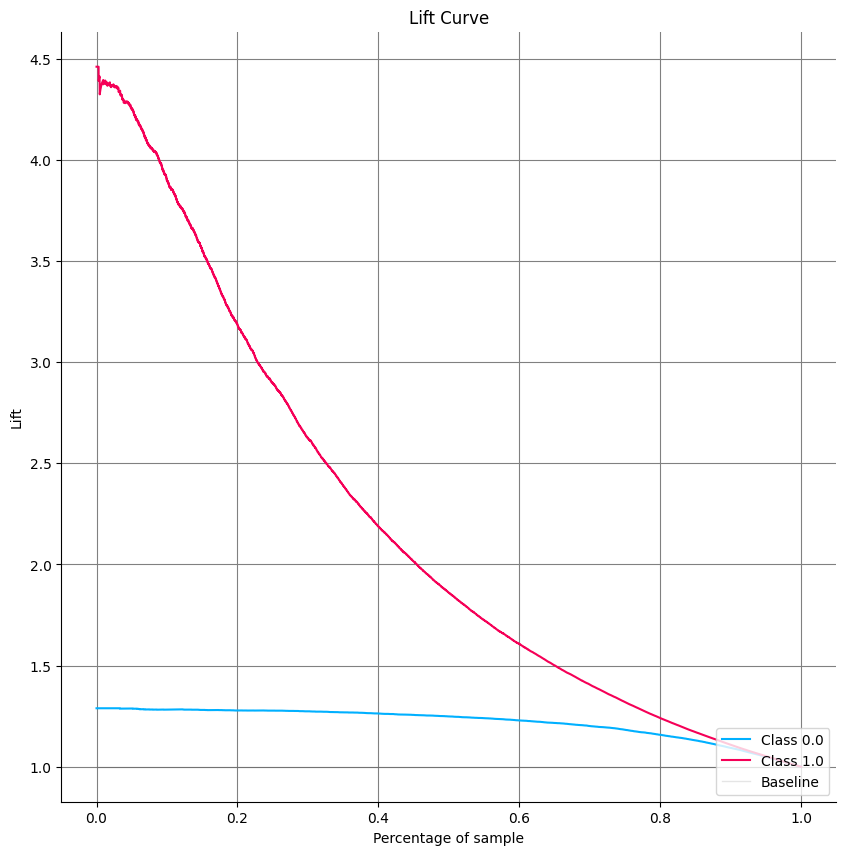

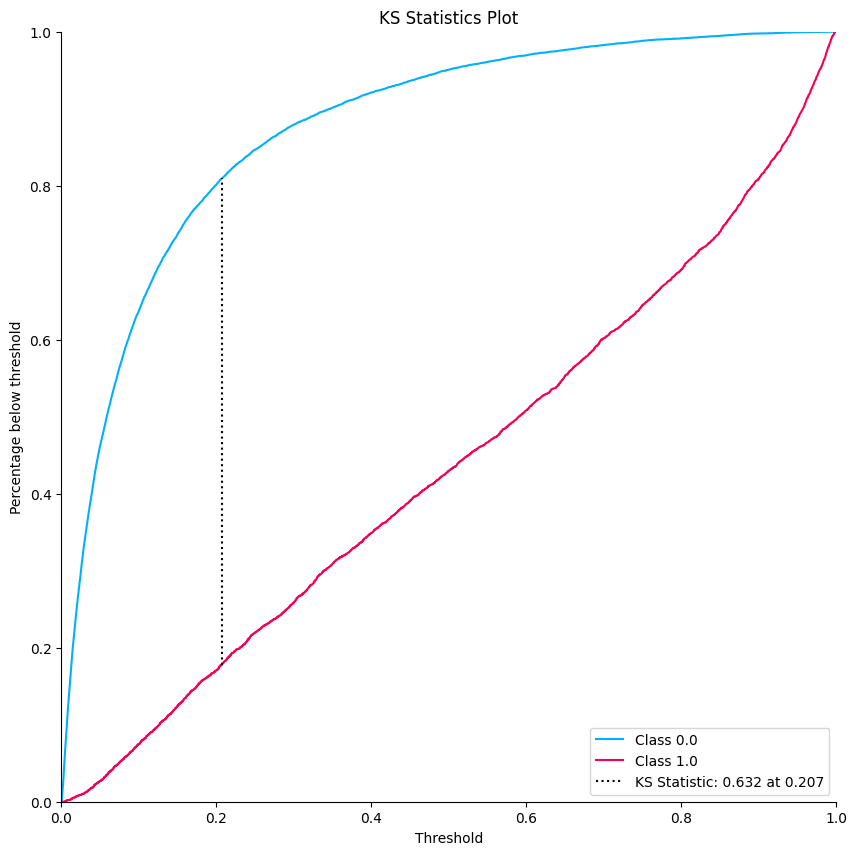

In [23]:
from sklearn_evaluation import plot
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = [10, 10]

predictions = model.predict_proba(test)
pre = predictions[:,1] >= .5
df_test['predicted'] = pre
                                        
plot.confusion_matrix(y_test, predictions[:,1] >= .5, normalize=True)
plt.show()
plot.confusion_matrix(y_test, predictions[:,1] >= .5, normalize=False)
plt.show()
plot.roc(y_test, predictions)
plt.show()
plot.precision_recall(y_test,  predictions)
plt.show()
print(accuracy_score(y_test, pre))
print(precision_score(y_test, pre))
print(recall_score(y_test, pre))
print(f1_score(y_test, pre))

plot.cumulative_gain(y_test, predictions)
plt.show()

plot.cumulative_gain_lift_curve.lift_curve(y_test, predictions)
plt.show()

plot.ks_statistic(y_test, predictions)
plt.show()


In [24]:
train_cols

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Month', 'Day', 'DayOfWeek', 'MonthlyMinTemp',
       'MonthlyMaxTemp', 'MonthlyRainfall', 'MonthlyEvaporation',
       'MonthlySunshine', 'MonthlyWindGustSpeed', 'MonthlyWindSpeed9am',
       'MonthlyWindSpeed3pm', 'MonthlyHumidity9am', 'MonthlyHumidity3pm',
       'MonthlyPressure9am', 'MonthlyPressure3pm', 'MonthlyCloud9am',
       'MonthlyCloud3pm', 'MonthlyTemp9am', 'MonthlyTemp3pm', 'MonthlyDay',
       'MonthlyDayOfWeek', 'RainPast5Days', 'AvgMaxTemp5Days',
       'AvgSunshine5Days', 'AvgRainfall5Days'],
      dtype='object')

In [25]:
!pip install sklearn-evaluation

In [26]:
!pip install --upgrade matplotlib --user

In [27]:
from importlib import reload
import matplotlib
reload(matplotlib)

<module 'matplotlib' from 'C:\\Users\\cappr\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\__init__.py'>

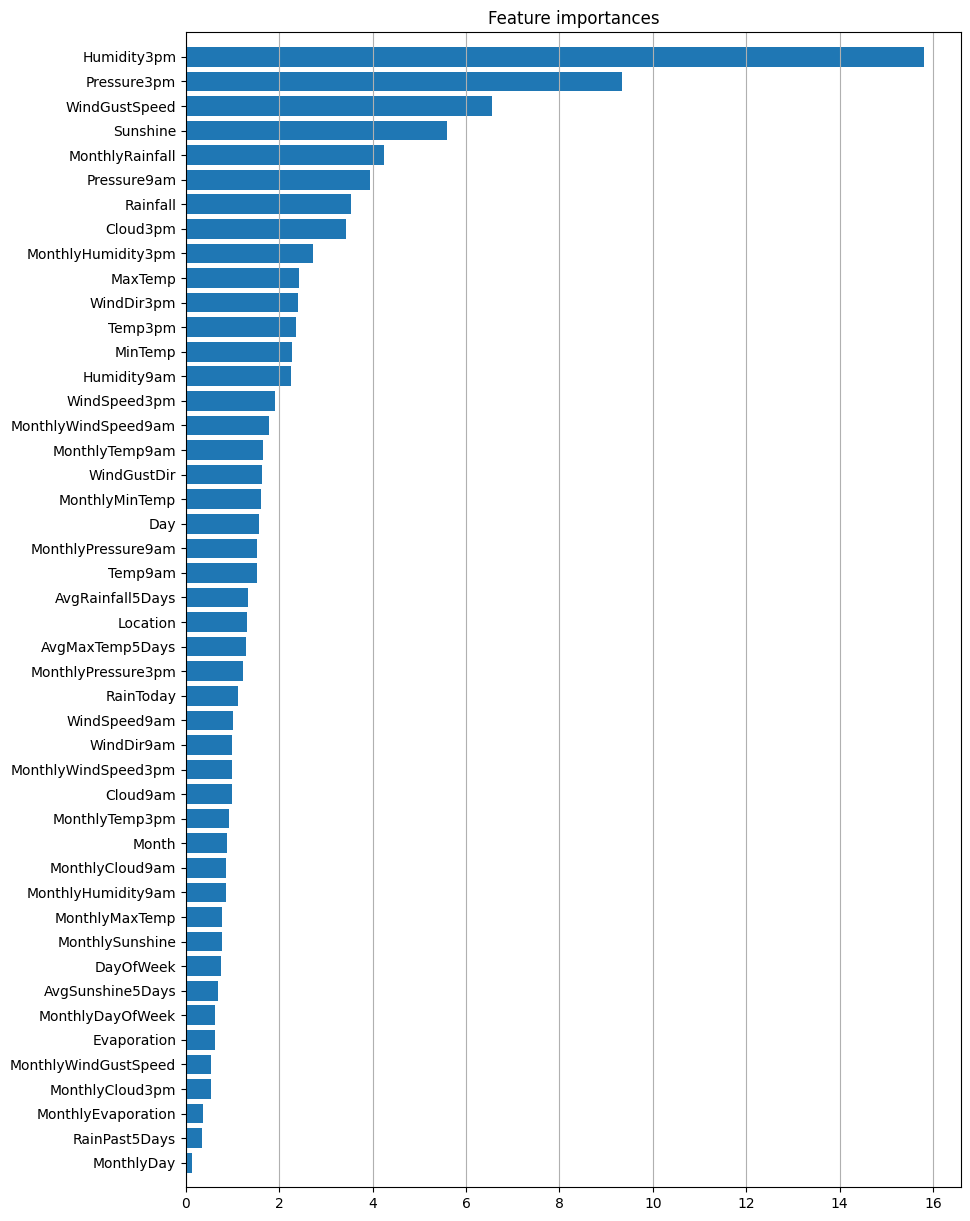

In [28]:
from sklearn_evaluation import plot
plt.figure(figsize=(10, 15))
plot.feature_importances(model.steps[1][1], feature_names=train_cols)
plt.show()